# **Web Traffic Flow Prediction**

## Problem Statement:
This project aims to predict the traffic of Wikipedia pages based on their historical traffic data. The data consists of page traffic information from the Wikipedia website, where each row in the dataset corresponds to a particular article, and each column corresponds to a particular date.

This model will help the Wikipedia team to plan their resources efficiently, as they can predict the number of visits to their website in advance. It will also help them identify popular and trending pages and provide better user experiences by directing more resources.


### Data Description

The data is provided in two files, web_traffic_data.csv and articles_data.csv. The web_traffic_data.csv file contains traffic data, where each row represents a particular article and each column represents a particular date. The page names contain the Wikipedia project, access, and agent types. The articles_data.csv file maps the page names and the shortened Id column used for prediction.


#### Tasks
 * Data cleaning: The dataset contains missing values, so the first task would be to clean the data by filling in the missing values or removing rows with missing values.
 * Exploratory data analysis: Conduct exploratory data analysis to gain insights into the dataset. This can include visualizations, statistical summaries, and correlation analyses.
 * Time series modeling: Using time series models to forecast the traffic flow for each article. Possible models include ARIMA, SARIMA, and Prophet.
* Model evaluation: Evaluating the performance of the time series models using metrics such as R2, MSE, and RMSE.

 * Feature engineering: Creating additional features such as lagged variables, moving averages, and seasonal indicators to improve the forecasting accuracy of the models, if needed.
 * Prediction intervals: Calculate prediction intervals to measure uncertainty around the traffic flow forecasts. Hint: Confidence Intervals: Prediction intervals measure the uncertainty around the forecasted traffic flow values. They provide a range within which the actual traffic flow is expected to fall with a certain level of confidence.
* Visualization: Creating visualizations to communicate the findings and insights from the analysis, such as line plots, heatmaps, and scatterplots.


# Load Libraries and data files.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # to separate pages based on language (regular expression)
import matplotlib.pyplot as plt # to visualize data
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings

## Load data

In [2]:
train = pd.read_csv("C:/Users/ADMIN/OneDrive/DS Projects/Web Traffic Flow Prediction/Data/web_traffic_data.csv")
train.shape

(145063, 551)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [4]:
train.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [5]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


##### Our data has misisng values, lets fill them with zeros

In [6]:
train=train.fillna(0)

In [7]:
# We have filled misisng valies with zero
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [8]:
data=train['Page']
data.head()

0              2NE1_zh.wikipedia.org_all-access_spider
1               2PM_zh.wikipedia.org_all-access_spider
2                3C_zh.wikipedia.org_all-access_spider
3           4minute_zh.wikipedia.org_all-access_spider
4    52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
Name: Page, dtype: object

In [9]:
train.tail()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145062,Francisco_el_matemático_(serie_de_televisión_d...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
## Cleaning up data

In [11]:
# Lets save some memory by casting the float data as integers
for col in train.columns[1:]:
    train[col]=pd.to_numeric(train[col],downcast ='integer')
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,...,32,63,15,26,14,20,22,19,18,20
1,2PM_zh.wikipedia.org_all-access_spider,11,14,15,18,11,13,22,11,10,...,17,42,28,15,9,30,52,45,26,20
2,3C_zh.wikipedia.org_all-access_spider,1,0,1,1,0,4,0,3,4,...,3,1,1,7,4,4,6,3,4,17
3,4minute_zh.wikipedia.org_all-access_spider,35,13,10,94,4,26,14,9,11,...,32,10,26,27,16,11,17,19,10,11
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0,0,0,0,0,0,0,0,0,...,48,9,25,13,3,11,27,13,36,10


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: int32(550), object(1)
memory usage: 305.5+ MB


In [13]:
train.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,...,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05
mean,1.024882e+03,1.031234e+03,9.731234e+02,1.003791e+03,1.044342e+03,1.108086e+03,1.062624e+03,1.026181e+03,1.030808e+03,1.022828e+03,...,1.357067e+03,1.343449e+03,1.362474e+03,1.484413e+03,1.634242e+03,1.635483e+03,1.590915e+03,1.639885e+03,1.431160e+03,1.442972e+03
std,6.735340e+04,6.868551e+04,6.449417e+04,6.720994e+04,6.834087e+04,7.464303e+04,7.016081e+04,6.325117e+04,6.632223e+04,6.689720e+04,...,8.460264e+04,7.636701e+04,8.384845e+04,8.638560e+04,9.661396e+04,9.113984e+04,9.064050e+04,8.894637e+04,8.052685e+04,8.766977e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,...,1.800000e+01,1.900000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.900000e+01,2.000000e+01,2.000000e+01,1.900000e+01,1.800000e+01
50%,5.800000e+01,5.700000e+01,5.400000e+01,5.500000e+01,5.900000e+01,5.900000e+01,6.100000e+01,6.300000e+01,6.100000e+01,5.900000e+01,...,1.370000e+02,1.330000e+02,1.220000e+02,1.330000e+02,1.460000e+02,1.490000e+02,1.490000e+02,1.470000e+02,1.420000e+02,1.250000e+02
75%,4.090000e+02,4.060000e+02,3.980000e+02,3.880000e+02,4.280000e+02,4.340000e+02,4.310000e+02,4.360000e+02,4.350000e+02,4.300000e+02,...,5.850000e+02,5.770000e+02,5.510000e+02,6.040000e+02,6.340000e+02,6.450000e+02,6.300000e+02,6.260000e+02,6.120000e+02,5.420000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [14]:
# Lets visualize the data

<AxesSubplot:>

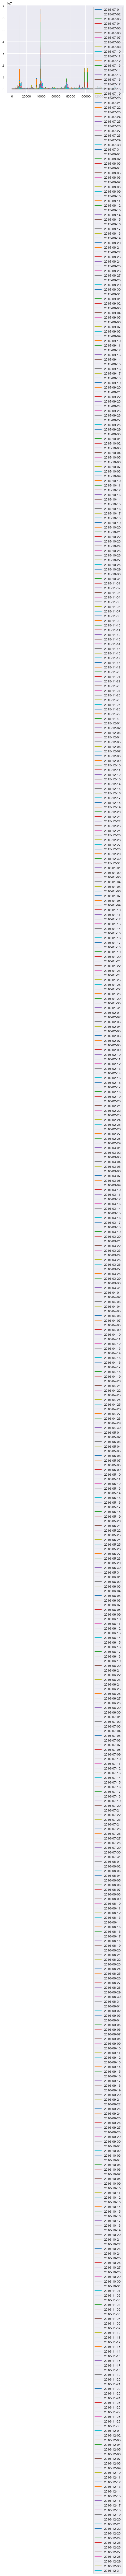

In [15]:
train.plot()

In [16]:
### Testing for Stationarity 

In [17]:
from statsmodels.tsa.stattools import adfuller
test_results = adfuller(train['2015-07-01'])


In [18]:
#Lets test hypothesis that  
# Ho: It is Stationary
# H1: It is not stationery

def adfuller_test(train):
    result= adfuller(train)
    labels=['ADF Test Statistic', 'p-value', '#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' :'+str(value))
    if result[1] <=0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against the null hypothesis(Ho), Time series has a unit root, indicating it is non-stationary")
  

In [19]:
adfuller_test(train['2015-07-01'])

ADF Test Statistic :-380.66985050912143
p-value :0.0
#Lags Used :0
Number of Observations Used :145062
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [20]:
# Differencing of page differences

In [21]:
# First, create a new DataFrame with the Page differences column
page_diffs = train['2015-07-01'] - train['2015-07-01'].shift(1)
page_diffs.name = 'Page differences'

# Then, concatenate the new DataFrame with the original train DataFrame
train = pd.concat([train, page_diffs], axis=1)


In [22]:
train['2015-07-01'].shift(1)

0          NaN
1         18.0
2         11.0
3          1.0
4         35.0
          ... 
145058     0.0
145059     0.0
145060     0.0
145061     0.0
145062     0.0
Name: 2015-07-01, Length: 145063, dtype: float64

In [23]:
# First, create a new DataFrame with the Page differences column
page_diffs1 = train['2015-07-01'] - train['2015-07-01'].shift(12)
page_diffs1.name = 'Seasonal First Differences'

# Then, concatenate the new DataFrame with the original train DataFrame
train = pd.concat([train, page_diffs1], axis=1)

In [24]:
train.head(14)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Page differences,Seasonal First Differences
0,2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,...,15,26,14,20,22,19,18,20,NaN,NaN
1,2PM_zh.wikipedia.org_all-access_spider,11,14,15,18,11,13,22,11,10,...,28,15,9,30,52,45,26,20,-7.0,NaN
2,3C_zh.wikipedia.org_all-access_spider,1,0,1,1,0,4,0,3,4,...,1,7,4,4,6,3,4,17,-10.0,NaN
3,4minute_zh.wikipedia.org_all-access_spider,35,13,10,94,4,26,14,9,11,...,26,27,16,11,17,19,10,11,34.0,NaN
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0,0,0,0,0,0,0,0,0,...,25,13,3,11,27,13,36,10,-35.0,NaN
5,5566_zh.wikipedia.org_all-access_spider,12,7,4,5,20,8,5,17,24,...,8,17,32,19,23,17,17,50,12.0,NaN
6,91Days_zh.wikipedia.org_all-access_spider,0,0,0,0,0,0,0,0,0,...,33,8,11,4,15,6,8,6,-12.0,NaN
7,A'N'D_zh.wikipedia.org_all-access_spider,118,26,30,24,29,127,53,37,20,...,35,28,20,23,32,39,32,17,118.0,NaN
8,AKB48_zh.wikipedia.org_all-access_spider,5,23,14,12,9,9,35,15,14,...,72,36,33,30,36,38,31,97,-113.0,NaN
9,ASCII_zh.wikipedia.org_all-access_spider,6,3,5,12,6,5,4,13,9,...,22,29,30,29,35,44,26,41,1.0,NaN


In [25]:
## Lets test the dickey fuller test
adfuller_test(train['Seasonal First Differences'].dropna())

ADF Test Statistic :-77.90496769689106
p-value :0.0
#Lags Used :71
Number of Observations Used :144979
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

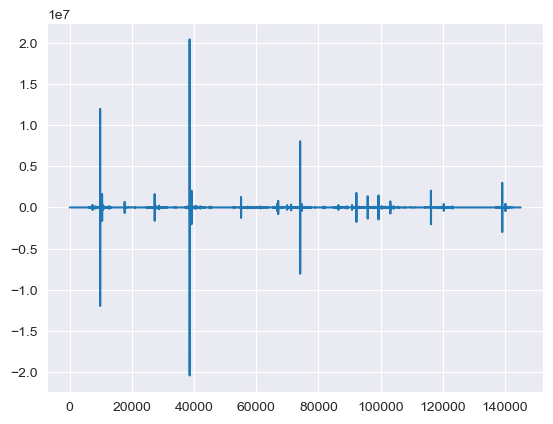

In [26]:
train['Seasonal First Differences'].plot()

In [27]:
## AR Model

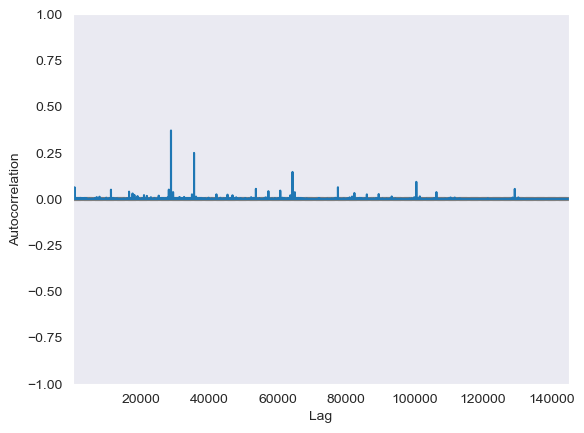

In [28]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train['2015-07-01'])
plt.show()

In [29]:
# ACF

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

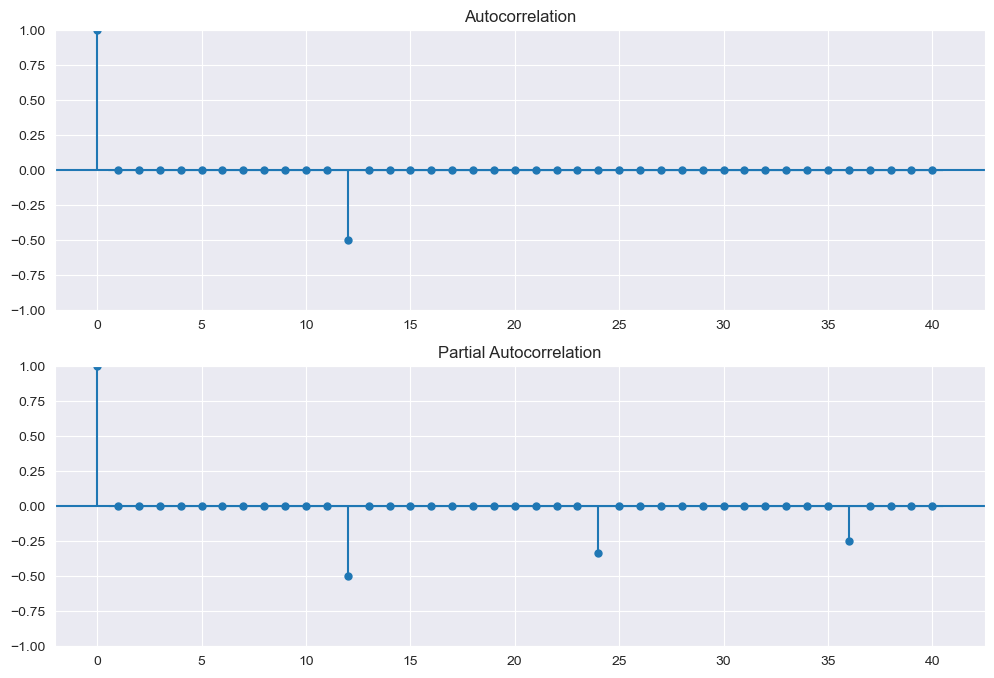

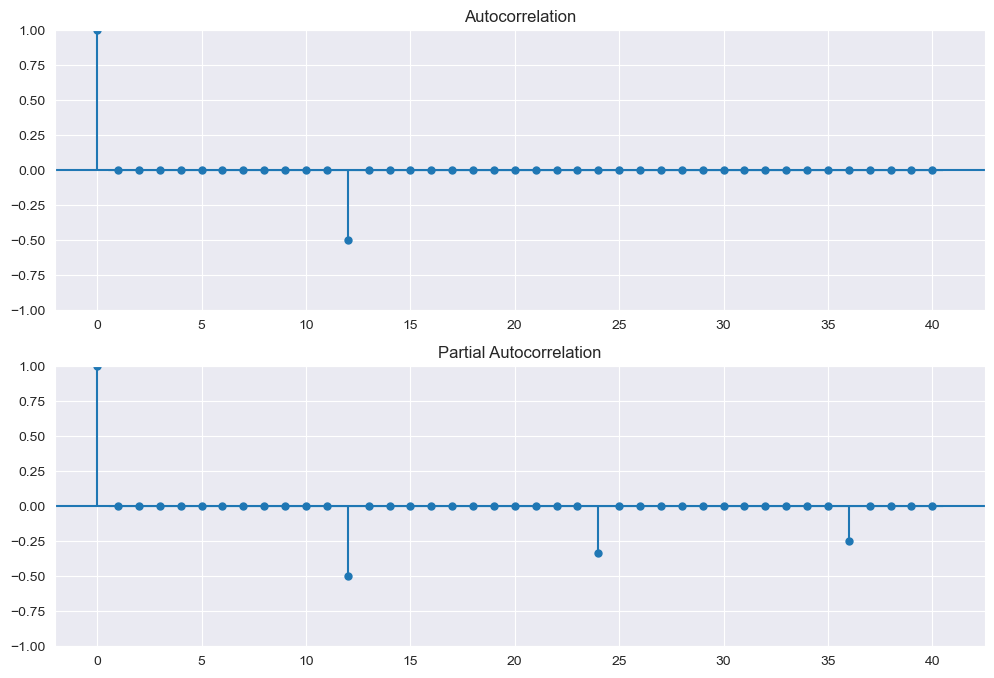

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(train['Seasonal First Differences'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(train['Seasonal First Differences'].iloc[13:], lags=40, ax=ax2, method='ywm')


# Is traffic Influenced by Page Language?

Lets see how different languages used in Wikipedia might affecr rge dataset. We use simple regex  to search for the language  code in wikipedia url. We notice there are non wikipedia urls  that will fail in the egex searcg. They include wikimediapages, so we will give them the code 'na' since we cant determine the language. i suspect many of these will be mages that do not really have a language

In [32]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org', page)
    if res:
        return res.group(0)[0:2]
    return 'na'


train['lang']= train.Page.map(get_language)
from collections import Counter
print(Counter(train.lang))

Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17376\1689073246.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['lang']= train.Page.map(get_language)


In [33]:
lang_sets = {}
lang_sets['en'] = train[train.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train[train.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train[train.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train[train.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train[train.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train[train.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train[train.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train[train.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

How does the total number of views change over time? lets plot all the different sets on teh same plot

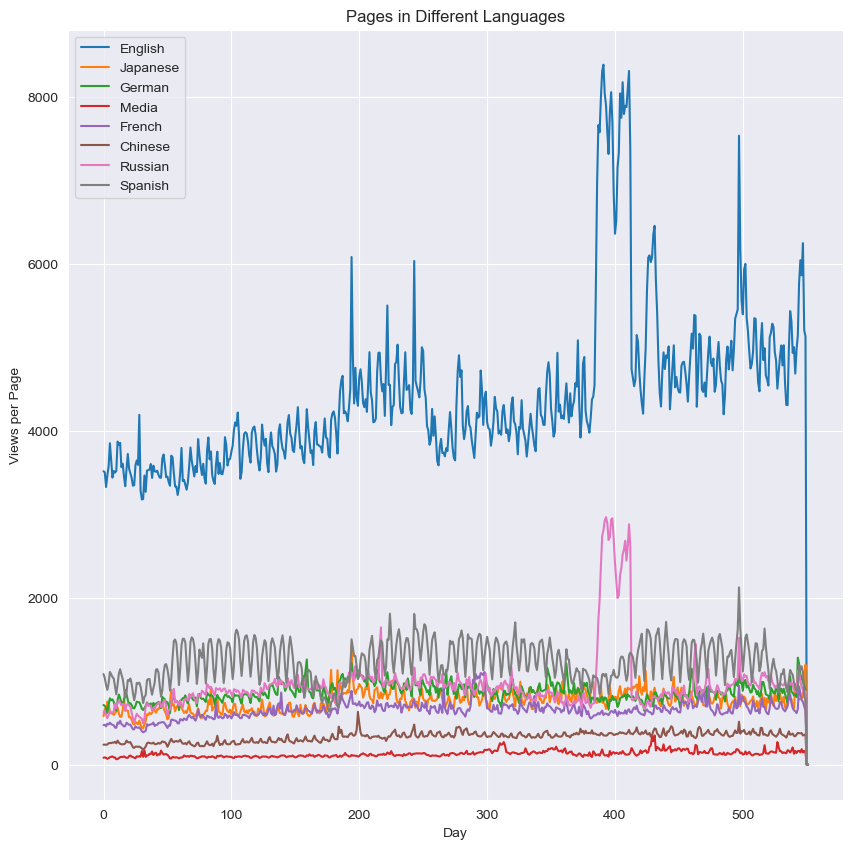

In [34]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()

In [35]:
def plot_entry(key, idx):
    data = lang_sets[key].iloc[idx, 1:]
    fig = plt.figure(1, figsize=[10, 5])
    plt.plot(days, data)
    plt.ylabel('Views')
    plt.xlabel('Day')
    plt.title(train.iloc[lang_sets[key].index[idx], 0] + ' - ' + key + ' Wikipedia Page Views')


First Lets look ar English pages

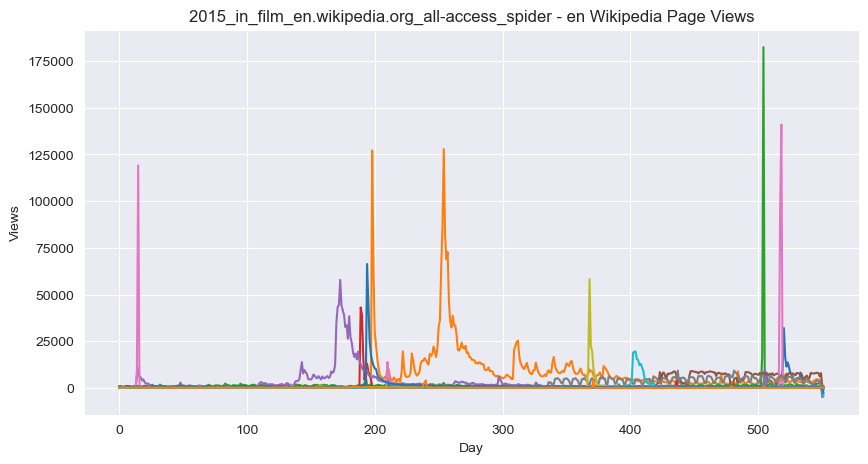

In [36]:
idx =[1,5,10,50,250,500,750,1000,1500,2000,3000,5000]
for i in idx:
    plot_entry('en',i)

Spanish

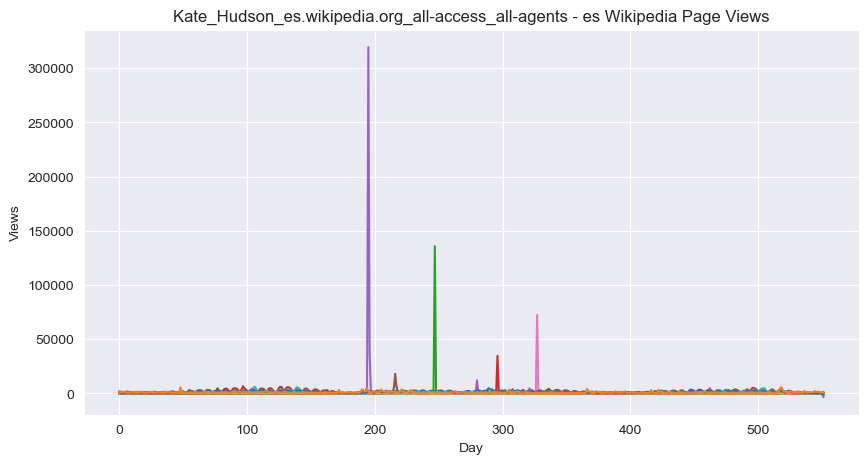

In [37]:
idx =[1,5,10,50,250,500,750,1000,1500,2000,3000,5000]
for i in idx:
    plot_entry('es',i)

Japanese

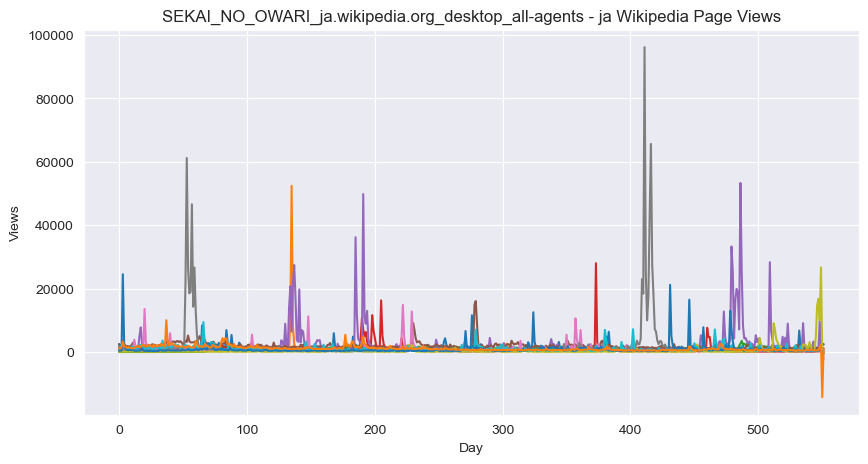

In [38]:
idx =[1,5,10,50,250,500,750,1000,1500,2000,3000,5000]
for i in idx:
    plot_entry('ja',i)

France

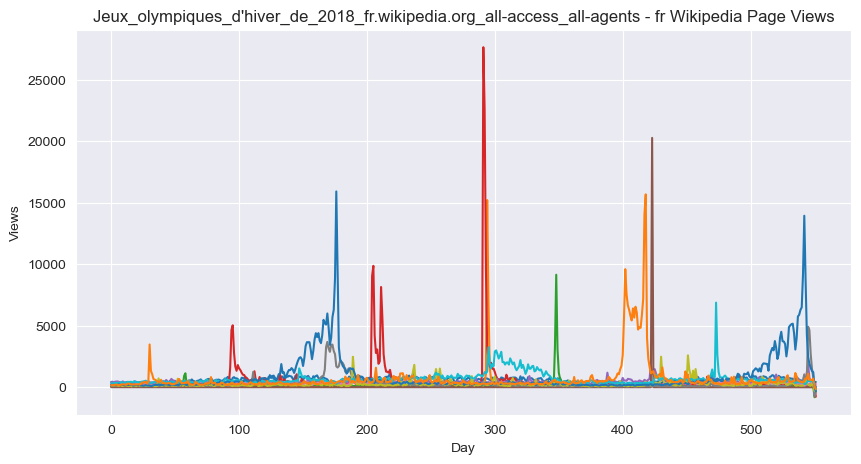

In [39]:
idx =[1,5,10,50,250,500,750,1000,1500,2000,3000,5000]
for i in idx:
    plot_entry('fr',i)

## How does aggregated data compare to the most popular pages

In [40]:
# For each language let's get the highest pages
npages = 5
top_pages = {}
for key in lang_sets:
    print(key)
    sum_set = pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total'] = lang_sets[key].iloc[:, 1:].sum(axis=1)
    sum_set = sum_set.sort_values('total', ascending=False)
    print(sum_set.head(10))
    top_pages[key] = sum_set.index[0]
    print('\n\n')


en
                                                    Page         total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  1.210693e+10
9774       Main_Page_en.wikipedia.org_desktop_all-agents  8.798400e+09
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.170048e+09
39180  Special:Search_en.wikipedia.org_all-access_all...  1.308140e+09
10403  Special:Search_en.wikipedia.org_desktop_all-ag...  1.015080e+09
74690  Special:Search_en.wikipedia.org_mobile-web_all...  2.929405e+08
39172  Special:Book_en.wikipedia.org_all-access_all-a...  1.343364e+08
10399   Special:Book_en.wikipedia.org_desktop_all-agents  1.336356e+08
33644       Main_Page_en.wikipedia.org_all-access_spider  1.290548e+08
34257  Special:Search_en.wikipedia.org_all-access_spider  1.243109e+08



ja
                                                     Page        total
120336      メインページ_ja.wikipedia.org_all-access_all-agents  211583615.0
86431          メインページ_ja.wikipedia.org_desktop_all-agents  134718784

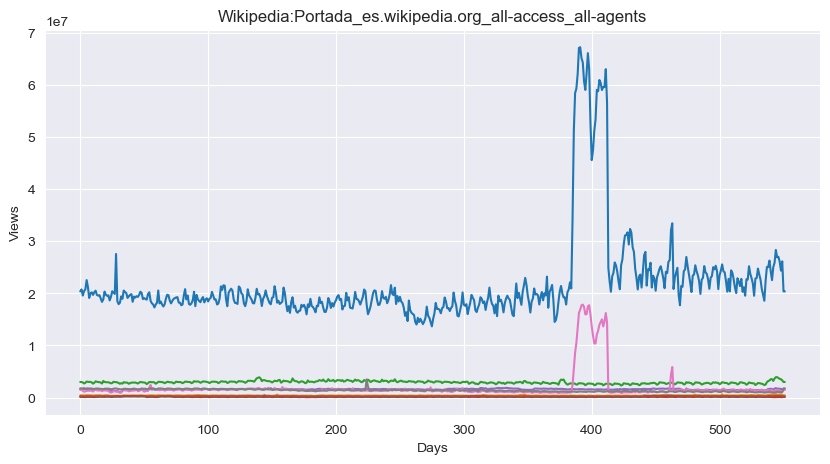

In [41]:
for key in top_pages:
    fig = plt.figure(1, figsize=[10, 5])
    cols = train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key], cols]
    if len(data) != len(days):
        diff = len(days) - len(data)
        if diff > 0:
            data = np.pad(data, (0, diff), 'constant')
        else:
            data = data[:len(days)]
    plt.plot(days, data)
    plt.ylabel('Views')
    plt.xlabel('Days')
    plt.title(train.iloc[top_pages[key], 0])


## Making Predictions

### ARIMA

Main_Page_en.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


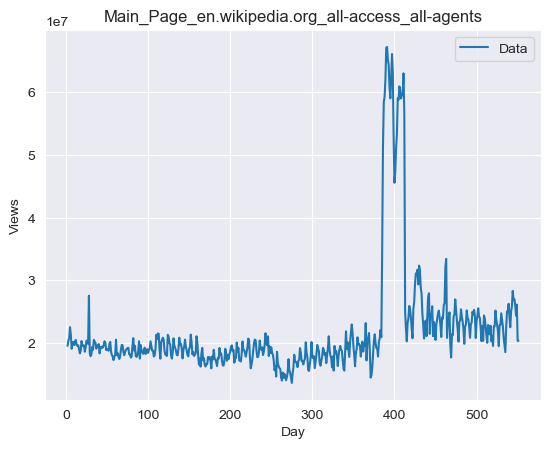

メインページ_ja.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


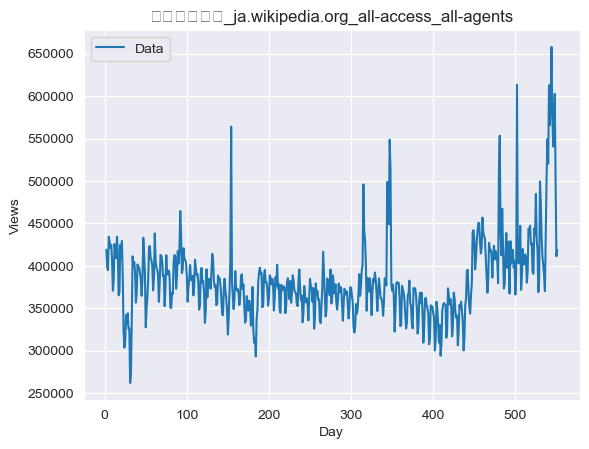

Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


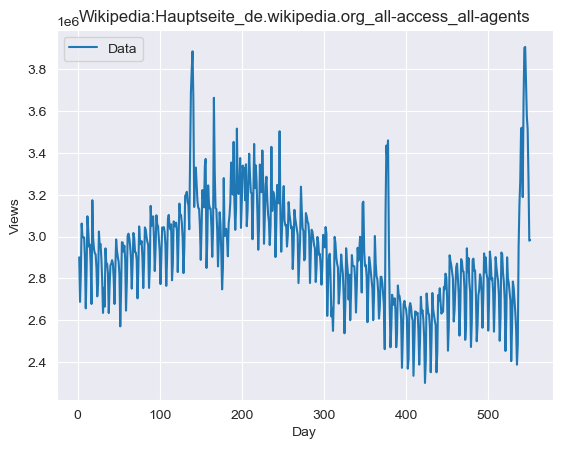

Special:Search_commons.wikimedia.org_all-access_all-agents
	ARIMA failed!!!


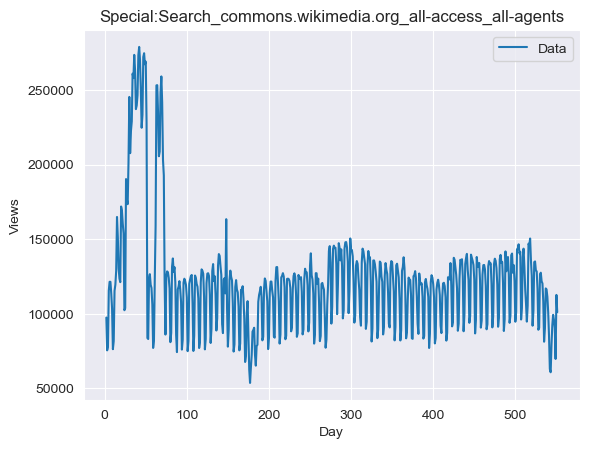

Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


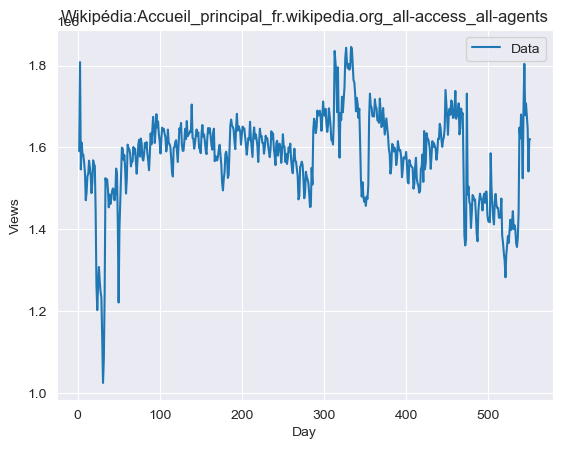

Wikipedia:首页_zh.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


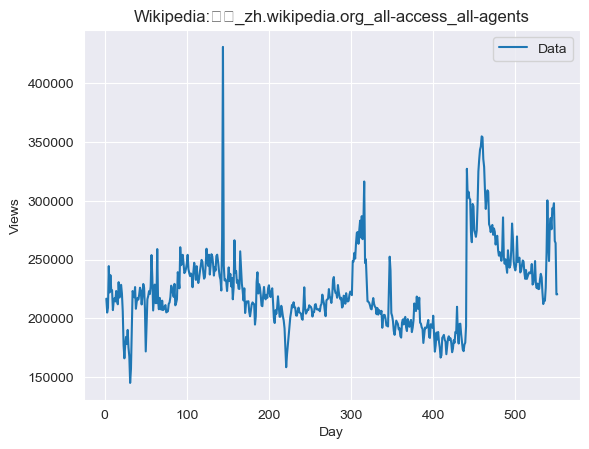

Заглавная_страница_ru.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


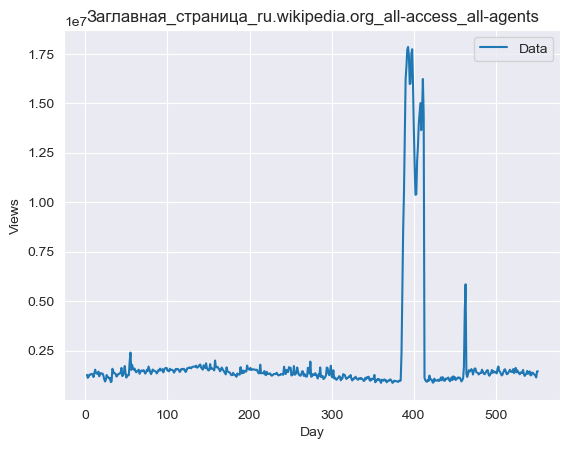

Wikipedia:Portada_es.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


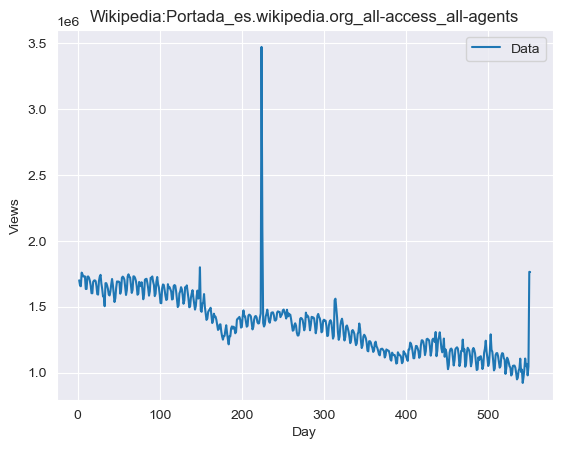

In [47]:
cols = train.columns[1:-1]
for key in top_pages:
    data = np.array(train.loc[top_pages[key], cols])
    results = None
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        try:
            arima = ARIMA(data, [2, 1, 4])
            result = arima.fit(disp=False)
            pred = result.forecast(598)
        except Exception:
            try:
                arima = ARIMA(data, [2, 1, 4])
                result = arima.fit(disp=False)
                pred = result.forecast(598)
            except Exception:
                print(train.loc[top_pages[key], 'Page'])
                print('\tARIMA failed!!!')
                result = None
                pred = None
        x = [i for i in range(600)]
        i = 0
        plt.plot(x[2:len(data)], data[2:], label='Data')
        if pred is not None:
            plt.plot(x[2:], pred, label='Prediction')
        plt.ylabel('Views')
        plt.xlabel('Day')
        plt.title(train.iloc[top_pages[key], 0])
        plt.legend()
        plt.show()


Main_Page_en.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


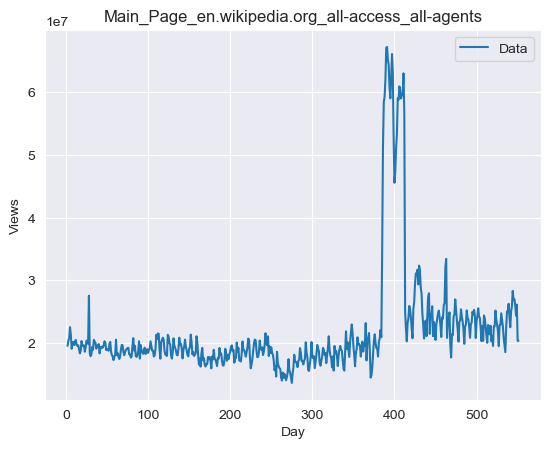

メインページ_ja.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


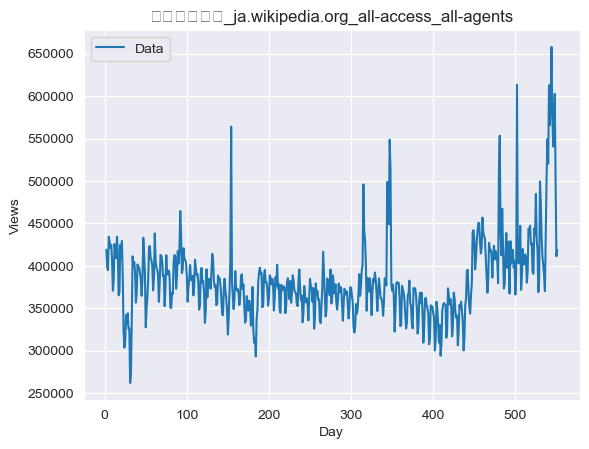

Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


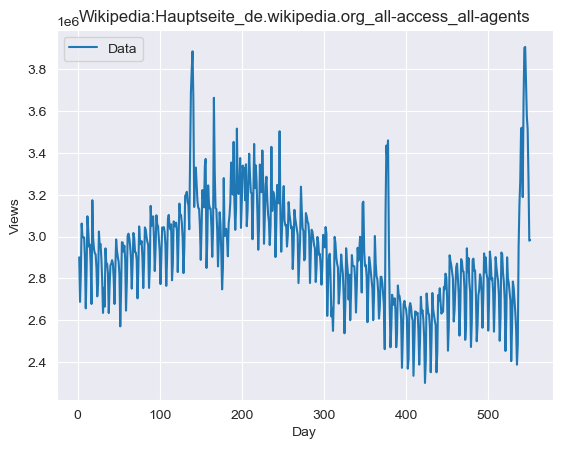

Special:Search_commons.wikimedia.org_all-access_all-agents
	ARIMA failed!!!


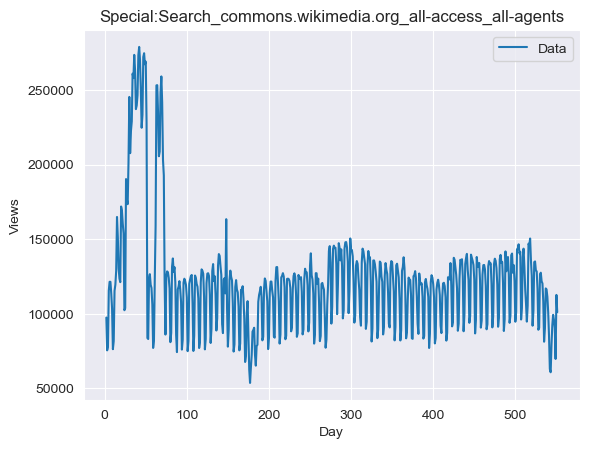

Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


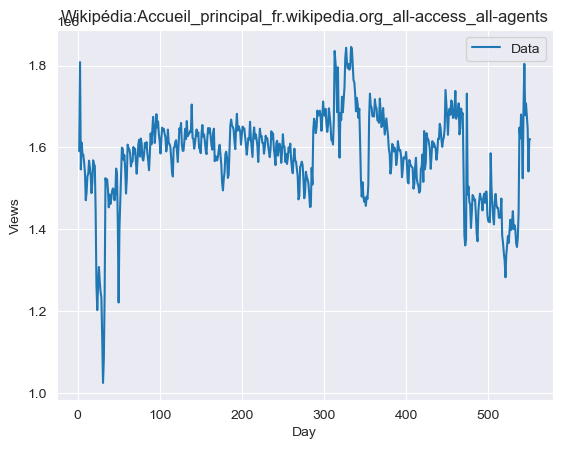

Wikipedia:首页_zh.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


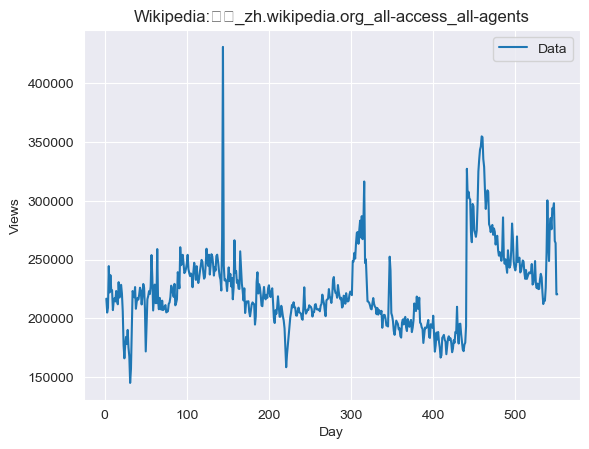

Заглавная_страница_ru.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


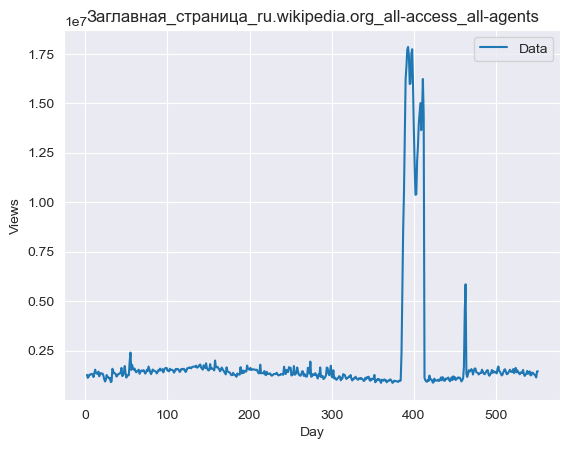

Wikipedia:Portada_es.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


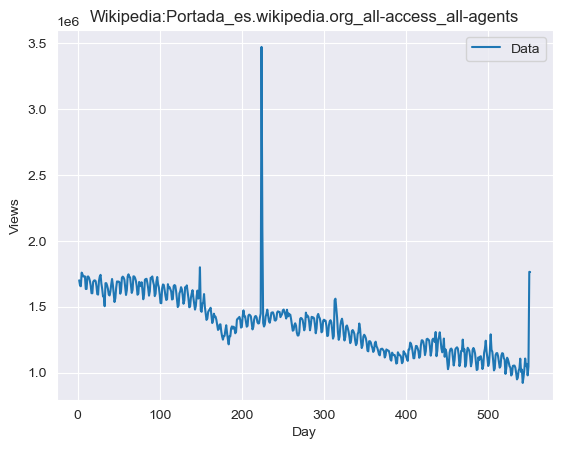

In [48]:
cols = train.columns[1:-1]
for key in top_pages:
    data = np.array(train.loc[top_pages[key], cols])
    results = None
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        try:
            arima = ARIMA(data, [2, 1, 4])
            result = arima.fit(disp=False)
            pred = result.forecast(598)
        except Exception:
            try:
                arima = ARIMA(data, [2, 1, 4])
                result = arima.fit(disp=False)
                pred = result.forecast(598)
            except Exception:
                print(train.loc[top_pages[key], 'Page'])
                print('\tARIMA failed!!!')
                result = None
                pred = None
        x = [i for i in range(600)]
        i = 0
        plt.plot(x[2:len(data)], data[2:], label='Data')
        if pred is not None:
            plt.plot(x[2:], pred, label='Prediction')
        plt.ylabel('Views')
        plt.xlabel('Day')
        plt.title(train.iloc[top_pages[key], 0])
        plt.legend()
        plt.show()



In [ ]:
#SARIMA

Main_Page_en.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


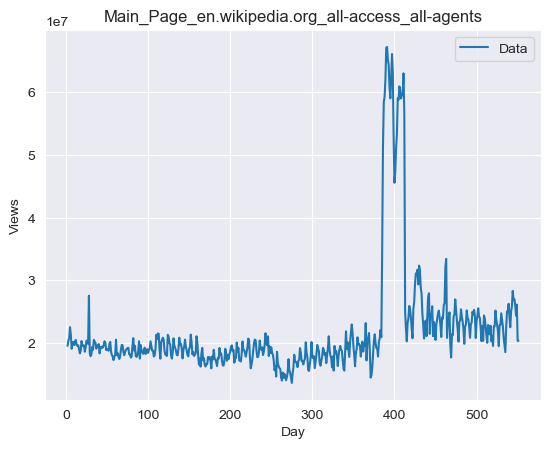

メインページ_ja.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


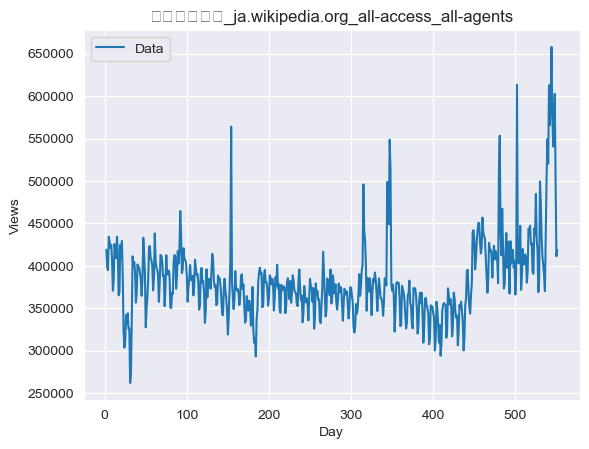

Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


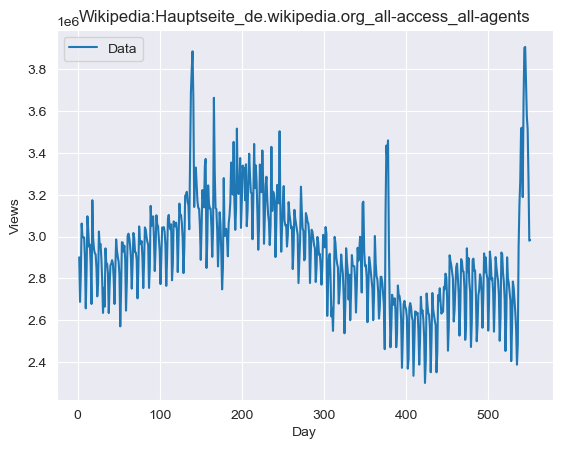

Special:Search_commons.wikimedia.org_all-access_all-agents
	ARIMA failed!!!


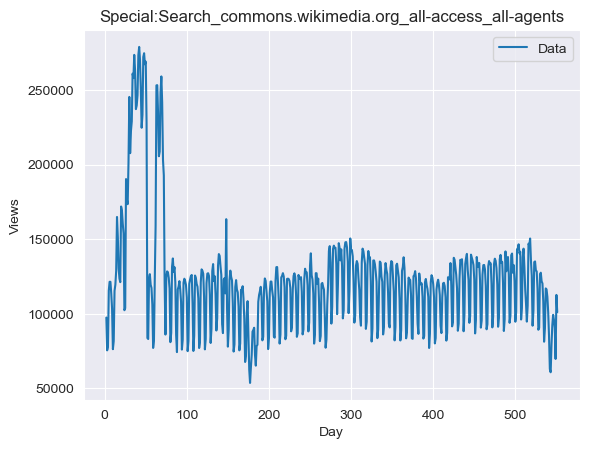

Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


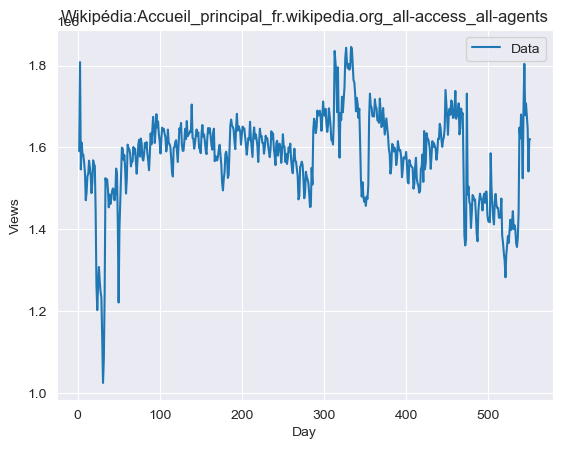

Wikipedia:首页_zh.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


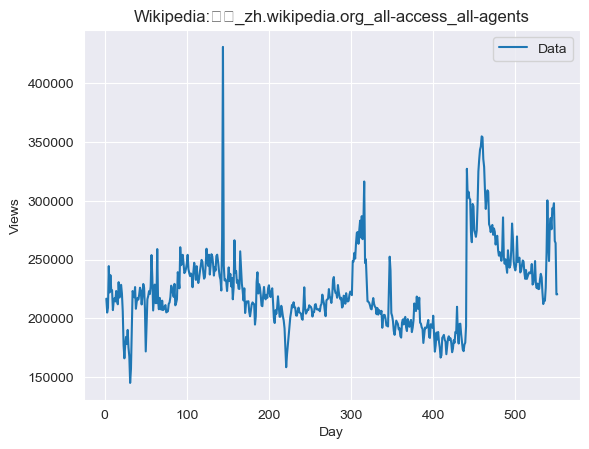

Заглавная_страница_ru.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


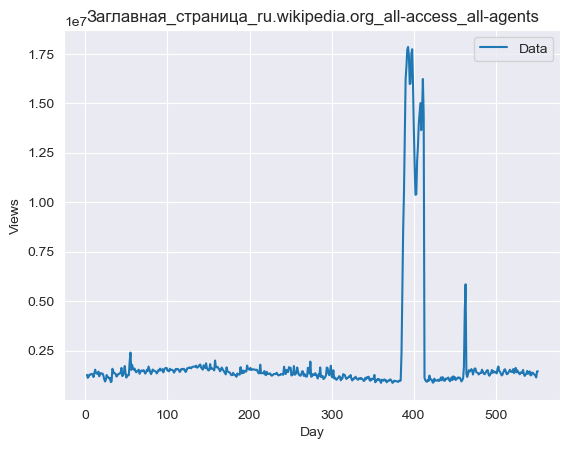

Wikipedia:Portada_es.wikipedia.org_all-access_all-agents
	ARIMA failed!!!


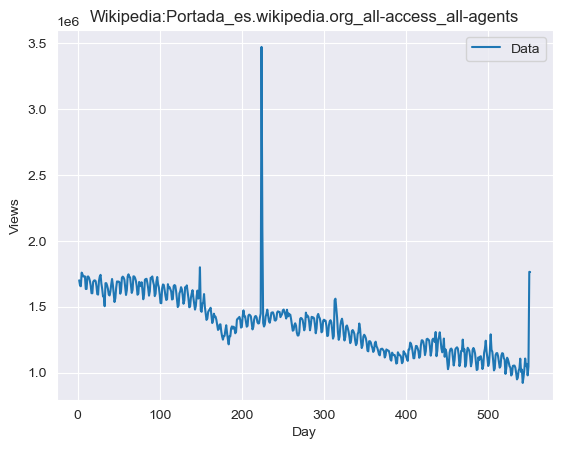

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

cols = train.columns[1:-1]
for key in top_pages:
    data = np.array(train.loc[top_pages[key], cols])
    results = None
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        try:
            arima = SARIMAX(data, order=(2, 1, 4), seasonal_order=(0, 1, 1, 7))
            result = arima.fit(disp=False)
            pred = result.forecast(598)
        except Exception:
            try:
                arima = SARIMAX(data, order=(2, 1, 4), seasonal_order=(0, 1, 1, 7))
                result = arima.fit(disp=False)
                pred = result.forecast(598)
            except Exception:
                print(train.loc[top_pages[key], 'Page'])
                print('\tARIMA failed!!!')
                result = None
                pred = None
        x = [i for i in range(600)]
        i = 0
        plt.plot(x[2:len(data)], data[2:], label='Data')
        if pred is not None:
            plt.plot(x[2:], pred, label='Prediction')
        plt.ylabel('Views')
        plt.xlabel('Day')
        plt.title(train.iloc[top_pages[key], 0])
        plt.legend()
        plt.show()


In [ ]:
## Model evaluation

C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12516 (\N{KATAKANA LETTER YA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12470 (\N{KATAKANA LETTER ZA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12461 (\N{KATAKANA LETTER KI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12490 (\N{KATAKANA LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\lib\s

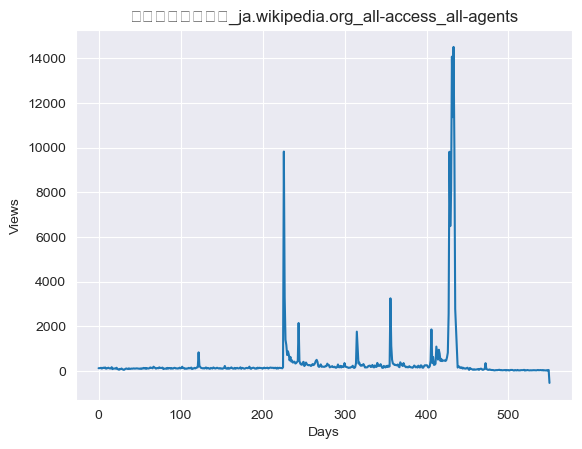

In [54]:
import matplotlib.pyplot as plt

# Select a random page
page = train.sample(1)['Page'].values[0]

# Get the data for the page
data = train[train['Page'] == page].iloc[:, 1:-2]

# Convert the data to a numpy array
data = data.values[0]

# Create a line plot
plt.plot(data)
plt.title(page)
plt.xlabel('Days')
plt.ylabel('Views')
plt.show()


In [53]:
train.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
       '2016-12-30', '2016-12-31', 'Page differences',
       'Seasonal First Differences', 'lang'],
      dtype='object', length=554)

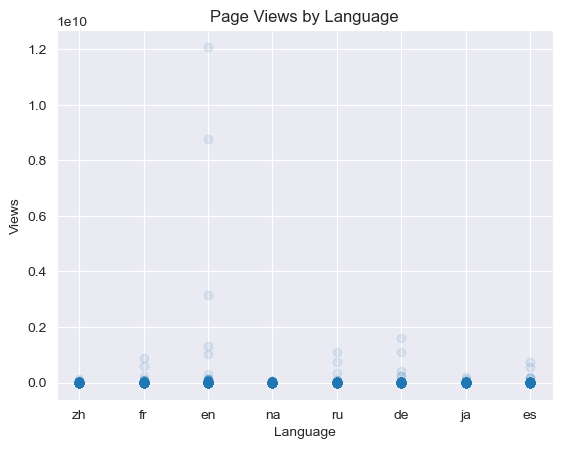

In [56]:
# Get the data for all pages
data = train[['Page', 'lang']].copy()

# Get the total number of page views for each page
data['views'] = train.iloc[:, 1:-2].sum(axis=1)

# Create a scatterplot
plt.scatter(data['lang'], data['views'], alpha=0.1)
plt.title('Page Views by Language')
plt.xlabel('Language')
plt.ylabel('Views')
plt.show()


In [58]:
echo "# Wikipedia-Web-Traffic-Flow-Prediction" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/keyegon/Wikipedia-Web-Traffic-Flow-Prediction.git
git push -u origin main

SyntaxError: invalid syntax (927446598.py, line 1)